In [130]:
# Importing the neccesary library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [153]:
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import RepeatVector
from tensorflow.keras.layers import TimeDistributed

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import load_model

In [ ]:
from sklearn.metrics import mean_squared_error, mean_squared_log_error, mean_absolute_error
from math import sqrt

In [77]:
# Reading the data
df = pd.read_csv('weatherHistory.csv')

In [78]:
# displaying the dataframe
df.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [79]:
# Setting Formatted Date as index column
df = df.set_index("Formatted Date")
df.index = pd.to_datetime(df.index)

In [26]:
df.head()

,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
Formatted Date,,,,,,,,,,,
2006-04-01 00:00:00+02:00,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
2006-04-01 01:00:00+02:00,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2006-04-01 02:00:00+02:00,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
2006-04-01 03:00:00+02:00,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
2006-04-01 04:00:00+02:00,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [81]:
# Handle missing values in 'Precip Type' without chained assignment
df['Precip Type'] = df['Precip Type'].fillna(df['Precip Type'].mode()[0])

In [82]:
# Drop irrelevant column 'Loud Cover' due to lack of variability
df.drop(columns=['Loud Cover'], inplace=True)

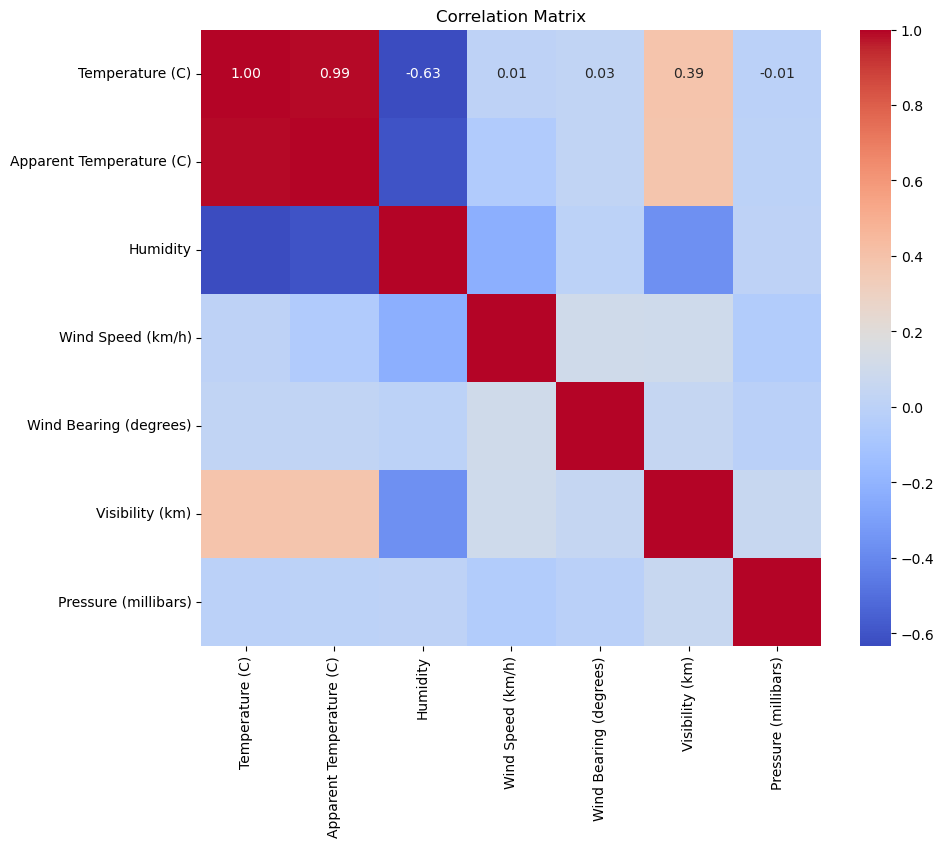

In [83]:
# Visualizing the data
numeric_data = df.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numeric_data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

In [84]:
df.shape

(96453, 10)

In [140]:
df.head()

,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
Formatted Date,,,,,,,,
2006-04-01 00:00:00+02:00,0,9.472222,7.388889,0.89,14.1197,251.0,15.8263,1015.13
2006-04-01 01:00:00+02:00,0,9.355556,7.227778,0.86,14.2646,259.0,15.8263,1015.63
2006-04-01 02:00:00+02:00,0,9.377778,9.377778,0.89,3.9284,204.0,14.9569,1015.94
2006-04-01 03:00:00+02:00,0,8.288889,5.944444,0.83,14.1036,269.0,15.8263,1016.41
2006-04-01 04:00:00+02:00,0,8.755556,6.977778,0.83,11.0446,259.0,15.8263,1016.51


In [86]:
# Dropping the relevant column
df.drop(columns=['Summary'], inplace=True)
df.drop(columns=['Daily Summary'], inplace=True)

In [87]:
# Displaying the the unique element of the column Precip Type
arr1 = []

for i in range(96453):
    el1 = df.iloc[i,0]
    if el1 not in arr1:
        arr1.append(el1)
    

print(arr1)


['rain', 'snow']


In [88]:
# Encoding the categorical column  to numerical
for i in range(96453):
    el1 = df.iloc[i,0]
    if el1 == arr1[0]:
        df.iloc[i,0] = 0
    else:
        df.iloc[i,0] = 1

In [141]:
df.head()

,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
Formatted Date,,,,,,,,
2006-04-01 00:00:00+02:00,0,9.472222,7.388889,0.89,14.1197,251.0,15.8263,1015.13
2006-04-01 01:00:00+02:00,0,9.355556,7.227778,0.86,14.2646,259.0,15.8263,1015.63
2006-04-01 02:00:00+02:00,0,9.377778,9.377778,0.89,3.9284,204.0,14.9569,1015.94
2006-04-01 03:00:00+02:00,0,8.288889,5.944444,0.83,14.1036,269.0,15.8263,1016.41
2006-04-01 04:00:00+02:00,0,8.755556,6.977778,0.83,11.0446,259.0,15.8263,1016.51


In [90]:
# taking the first 10000 rows
df = df.iloc[:10000]

In [91]:
df.head()

,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
Formatted Date,,,,,,,,
2006-04-01 00:00:00+02:00,0,9.472222,7.388889,0.89,14.1197,251.0,15.8263,1015.13
2006-04-01 01:00:00+02:00,0,9.355556,7.227778,0.86,14.2646,259.0,15.8263,1015.63
2006-04-01 02:00:00+02:00,0,9.377778,9.377778,0.89,3.9284,204.0,14.9569,1015.94
2006-04-01 03:00:00+02:00,0,8.288889,5.944444,0.83,14.1036,269.0,15.8263,1016.41
2006-04-01 04:00:00+02:00,0,8.755556,6.977778,0.83,11.0446,259.0,15.8263,1016.51


In [143]:
# Scaling the data using the MinMaxScaler
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df)

In [144]:
df_scaled

array([[0.        , 0.4600282 , 0.48755168, ..., 0.69916435, 0.983     ,
        0.97128614],
       [0.        , 0.4577503 , 0.48488746, ..., 0.72144847, 0.983     ,
        0.97176455],
       [0.        , 0.45818418, 0.52044097, ..., 0.56824513, 0.929     ,
        0.97206116],
       ...,
       [0.        , 0.73478685, 0.75470831, ..., 0.83008357, 0.892     ,
        0.97104694],
       [0.        , 0.74726109, 0.76527331, ..., 0.83286908, 0.93      ,
        0.97082687],
       [0.        , 0.75789131, 0.77427653, ..., 0.8356546 , 0.961     ,
        0.97064508]])

In [145]:
# checking if null value is present
np.isnan(np.sum(df_scaled))

False

In [146]:
# define a function which will split the dataset accordingly
def split_sequence(sequence, n_steps_in, n_steps_out):
    X, y, X_test, y_test = list(), list(), list(), list()
    for i in range(len(sequence)):
        end_ix = i + n_steps_in
        out_end_ix = end_ix + n_steps_out
        if out_end_ix > len(sequence):
            break
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix:out_end_ix]
        
        if i <= 9500:
            X.append(seq_x)
            y.append(seq_y)
        else:
            X_test.append(seq_x)
            y_test.append(seq_y)
    
    return np.array(X), np.array(y), np.array(X_test), np.array(y_test)

In [147]:
# Splitting the dataset
X, y, X_test, y_test = split_sequence(df_scaled, 24, 6)

In [148]:
print(X.shape)
print(y.shape)
print(X_test.shape)
print(y_test.shape)

(9501, 24, 8)
(9501, 6, 8)
(470, 24, 8)
(470, 6, 8)


In [150]:
n_features, n_epochs, n_neurons = df.columns.size, 10, 100

In [151]:
# reshapping the data
X = X.reshape((X.shape[0], X.shape[1], n_features))
y = y.reshape((y.shape[0], y.shape[1], n_features))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], n_features))
y_test = y_test.reshape((y_test.shape[0], y_test.shape[1], n_features))

In [152]:
print(X.shape)
print(y.shape)
print(X_test.shape)
print(y_test.shape)

(9501, 24, 8)
(9501, 6, 8)
(470, 24, 8)
(470, 6, 8)


In [154]:
n_steps_in, n_steps_out = 24, 6

In [155]:
len(X)

9501

In [49]:
# Defining a LSTM model
model = Sequential()
model.add(LSTM(n_neurons, activation='tanh', input_shape = (n_steps_in, n_features)))
model.add(RepeatVector(n_steps_out))
model.add(LSTM(n_neurons, activation='tanh', return_sequences=True))
model.add(TimeDistributed(Dense(n_features)))
model.compile(optimizer="adam", loss = "mse")
model.fit(X[:1],y[:1], epochs=n_epochs, verbose=1)

C:\Users\Admin\anaconda3new\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 11s 11s/step - loss: 0.3581
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step - loss: 0.3097
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step - loss: 0.2652
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step - loss: 0.2233
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step - loss: 0.1835
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step - loss: 0.1465
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step - loss: 0.1141
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step - loss: 0.0884
Epoch 9/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step - loss: 0.0697
Epoch 10/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step - loss: 0.0572


In [105]:
# Creating LSTM model 2
model2 = Sequential()
model2.add(LSTM(n_neurons, activation='tanh', input_shape = (n_steps_in, n_features)))
model2.add(RepeatVector(n_steps_out))
model2.add(LSTM(n_neurons, activation='tanh', return_sequences=True))
model2.add(TimeDistributed(Dense(n_features)))
model2.compile(optimizer="adam", loss = "mse")
model2.fit(X,y, epochs=n_epochs, verbose=1)

C:\Users\Admin\anaconda3new\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
297/297 ━━━━━━━━━━━━━━━━━━━━ 49s 112ms/step - loss: 0.0717
Epoch 2/5
297/297 ━━━━━━━━━━━━━━━━━━━━ 34s 115ms/step - loss: 0.0399
Epoch 3/5
297/297 ━━━━━━━━━━━━━━━━━━━━ 35s 117ms/step - loss: 0.0392
Epoch 4/5
297/297 ━━━━━━━━━━━━━━━━━━━━ 39s 130ms/step - loss: 0.0386
Epoch 5/5
297/297 ━━━━━━━━━━━━━━━━━━━━ 38s 127ms/step - loss: 0.0375


In [156]:
# Creating LSTM model 3
model3 = Sequential()
model3.add(LSTM(n_neurons, activation='tanh', input_shape = (n_steps_in, n_features)))
model3.add(RepeatVector(n_steps_out))
model3.add(LSTM(n_neurons, activation='tanh', return_sequences=True))
model3.add(TimeDistributed(Dense(n_features)))
model3.compile(optimizer="adam", loss = "mse")
model3.fit(X,y, epochs=n_epochs, verbose=1)

C:\Users\Admin\anaconda3new\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
297/297 ━━━━━━━━━━━━━━━━━━━━ 13s 20ms/step - loss: 0.0694
Epoch 2/10
297/297 ━━━━━━━━━━━━━━━━━━━━ 10s 20ms/step - loss: 0.0252
Epoch 3/10
297/297 ━━━━━━━━━━━━━━━━━━━━ 6s 21ms/step - loss: 0.0233
Epoch 4/10
297/297 ━━━━━━━━━━━━━━━━━━━━ 6s 22ms/step - loss: 0.0225
Epoch 5/10
297/297 ━━━━━━━━━━━━━━━━━━━━ 6s 19ms/step - loss: 0.0217
Epoch 6/10
297/297 ━━━━━━━━━━━━━━━━━━━━ 7s 22ms/step - loss: 0.0216
Epoch 7/10
297/297 ━━━━━━━━━━━━━━━━━━━━ 6s 22ms/step - loss: 0.0210
Epoch 8/10
297/297 ━━━━━━━━━━━━━━━━━━━━ 6s 21ms/step - loss: 0.0210
Epoch 9/10
297/297 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step - loss: 0.0207
Epoch 10/10
297/297 ━━━━━━━━━━━━━━━━━━━━ 6s 19ms/step - loss: 0.0204


In [157]:
# Intializing y_real for checking the models result
y_real = scaler.inverse_transform(y_test[:,0])

In [158]:
y_real

array([[   0.        ,   17.85      ,   17.85      , ...,  111.        ,
           9.982     , 1016.73      ],
       [   0.        ,   17.11111111,   17.11111111, ...,    0.        ,
          15.8263    , 1017.33      ],
       [   0.        ,   14.96111111,   14.96111111, ...,    2.        ,
          15.8263    , 1017.53      ],
       ...,
       [   0.        ,   19.92777778,   19.92777778, ...,  277.        ,
          10.8997    , 1016.11      ],
       [   0.        ,   20.62222222,   20.62222222, ...,  283.        ,
          11.5115    , 1015.89      ],
       [   0.        ,   21.35555556,   21.35555556, ...,  288.        ,
          12.1877    , 1015.65      ]])

In [159]:
# Creating predicted array 
y_predict = []
for i in range(len(X_test)):
    x_pred = X_test[i].reshape((1, X_test[i].shape[0], n_features))
    y_pred = model3.predict(x_pred)
    y_pred_itrans = scaler.inverse_transform(y_pred[0])
    y_predict.append(y_pred_itrans)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━

In [160]:
y_predict

[array([[-5.07381037e-02,  1.91805763e+01,  1.95846577e+01,
          5.09219766e-01,  5.08992434e+00,  2.32043808e+02,
          1.22461586e+01,  1.01371375e+03],
        [-5.69849387e-02,  1.75397530e+01,  1.77324982e+01,
          5.82257092e-01,  4.16280746e+00,  2.23261398e+02,
          1.32206039e+01,  1.01050476e+03],
        [-6.06778935e-02,  1.60318470e+01,  1.65658321e+01,
          6.46265924e-01,  4.11621904e+00,  2.22098358e+02,
          1.44729385e+01,  1.02211139e+03],
        [-5.80582246e-02,  1.46283503e+01,  1.52303963e+01,
          6.90803409e-01,  4.17713547e+00,  2.22215866e+02,
          1.52775555e+01,  1.02002179e+03],
        [-5.53324670e-02,  1.37945280e+01,  1.44906569e+01,
          7.20439553e-01,  4.26610565e+00,  2.24364594e+02,
          1.58228073e+01,  1.01946393e+03],
        [-5.31126782e-02,  1.32735853e+01,  1.40866508e+01,
          7.38566637e-01,  4.34929132e+00,  2.26334488e+02,
          1.61416149e+01,  1.01746271e+03]], dtype=float32),

In [161]:
Temp, Humidty, Pressure, WindSpd = [],[],[],[]
for i in y_predict:
    Temp.append(i[0][0])
    Humidty.append(i[0][1])
    Pressure.append(i[0][2])
    WindSpd.append(i[0][3])

In [163]:
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred)/y_true)) * 100

In [164]:
Temp_mae = mean_absolute_error(Temp, y_real[:,0])

Temp_rase = sqrt(mean_squared_error(Temp, y_real[:,0]))

Temp_mape = mean_absolute_percentage_error(Temp, y_real[:,0])

Humidity_mae = mean_absolute_error(Humidty, y_real[:,1])

Humidity_rase = sqrt(mean_squared_error(Humidty, y_real[:,1]))

Humidity_mape = mean_absolute_percentage_error(Humidty, y_real[:,1])

Pressure_mae = mean_absolute_error(Pressure, y_real[:,2])

Pressure_rase = sqrt(mean_squared_error(Pressure, y_real[:,2]))

Pressure_mape = mean_absolute_percentage_error(Pressure, y_real[:,2])

WindSpd_mae = mean_absolute_error(WindSpd, y_real[:,3])

WindSpd_rase = sqrt(mean_squared_error(WindSpd, y_real[:,3]))

WindSpd_mape = mean_absolute_percentage_error(WindSpd, y_real[:,3])

In [165]:
# Checking the accuracy of the model
results = pd.DataFrame({

    "Variable": ["Temp", "Humidity", "Pressure", "WindSpd"],

    "MAE":[Temp_mae, Humidity_mae, Pressure_mae, WindSpd_mae],

    "RMSE": [Temp_rase, Humidity_rase, Pressure_rase, WindSpd_rase],

    "MAPE": [Temp_mape, Humidity_mape, Pressure_mape, WindSpd_mape]

})


result_df = results.sort_values(by = "MAE", ascending = False)

result_df = result_df.set_index('Variable')

result_df

,MAE,RMSE,MAPE
Variable,,,
Humidity,1.330657,1.691358,5.935584
Pressure,1.134621,1.531800,5.079897
WindSpd,0.049147,0.061688,8.963159
Temp,0.033837,0.037591,100.000000


In [118]:
test_1 = model2.predict(x_pred)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


In [119]:
len(test_1[0])

72

In [135]:
print(x_pred)

[[[0.         0.62154247 0.65879651 ... 0.77994429 0.62       0.97253956]
  [0.         0.64616553 0.6796509  ... 0.88857939 0.62       0.97261611]
  [0.         0.70777742 0.7318328  ... 0.8913649  0.62       0.97263525]
  ...
  [0.         0.91376505 0.88387689 ... 0.90807799 0.62       0.97828042]
  [0.         0.93198829 0.89627928 ... 0.85793872 0.643      0.97809863]
  [0.         0.93404925 0.89435002 ... 0.88857939 0.62       0.97772547]]]


In [166]:
# Saving the model in h5
model3.save("model_3.h5")

In [123]:
# loading model
model22 = load_model("model_2.h5", compile=False) 
model22.compile(loss="mse", optimizer="adam")

In [124]:
# predicted the model
model22.predict(x_pred)

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


array([[[ 0.05280749,  0.6690623 ,  0.6884177 ,  0.6738902 ,
          0.21085076,  0.6013177 ,  0.70886743,  0.94723916],
        [-0.01457905,  0.6993599 ,  0.76159674,  0.6751854 ,
          0.18636616,  0.6127285 ,  0.74310565,  0.956631  ],
        [-0.02289241,  0.69220763,  0.751892  ,  0.6544671 ,
          0.17704199,  0.6042642 ,  0.726351  ,  0.9488778 ],
        [-0.01956995,  0.68082744,  0.73566246,  0.6429364 ,
          0.18007284,  0.5977897 ,  0.7103202 ,  0.938748  ],
        [-0.01502309,  0.6748398 ,  0.72720325,  0.639857  ,
          0.18499838,  0.5951658 ,  0.702116  ,  0.9343656 ],
        [-0.01181958,  0.6720021 ,  0.72343946,  0.6396564 ,
          0.18839078,  0.5943964 ,  0.6978944 ,  0.9323973 ],
        [-0.00986975,  0.6709016 ,  0.7221285 ,  0.64030236,
          0.19021352,  0.5945887 ,  0.6957253 ,  0.9316153 ],
        [-0.00877526,  0.6706025 ,  0.721904  ,  0.641012  ,
          0.19098502,  0.5951574 ,  0.69455576,  0.93131346],
        [-0.0081

In [126]:
model.predict(x_pred)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


array([[[ 0.04172155,  0.18154654,  0.20811853,  0.16000248,
          0.0138235 ,  0.07666537,  0.16217011,  0.06056069],
        [ 0.05297606,  0.3005384 ,  0.35536522,  0.2676553 ,
          0.02808862,  0.1302358 ,  0.29344678,  0.13223717],
        [ 0.0525774 ,  0.38031498,  0.4631245 ,  0.34512883,
          0.04748389,  0.17727998,  0.40040487,  0.21184875],
        [ 0.04619843,  0.43249178,  0.5419179 ,  0.4018403 ,
          0.06903821,  0.22153567,  0.48426443,  0.29146558],
        [ 0.03717706,  0.4658085 ,  0.59952265,  0.44443226,
          0.0908654 ,  0.26391393,  0.5481302 ,  0.36645237],
        [ 0.02747072,  0.48647672,  0.64158905,  0.4774913 ,
          0.1118771 ,  0.30407837,  0.59573555,  0.4343793 ],
        [ 0.01818153,  0.4987642 ,  0.6722359 ,  0.5040853 ,
          0.13150892,  0.34139442,  0.63067526,  0.49427232],
        [ 0.00986993,  0.5055517 ,  0.6944797 ,  0.52619576,
          0.14951366,  0.37535733,  0.6560361 ,  0.5460707 ],
        [ 0.0027

In [127]:
x_pred

array([[[0.        , 0.62154247, 0.65879651, ..., 0.77994429,
         0.62      , 0.97253956],
        [0.        , 0.64616553, 0.6796509 , ..., 0.88857939,
         0.62      , 0.97261611],
        [0.        , 0.70777742, 0.7318328 , ..., 0.8913649 ,
         0.62      , 0.97263525],
        ...,
        [0.        , 0.91376505, 0.88387689, ..., 0.90807799,
         0.62      , 0.97828042],
        [0.        , 0.93198829, 0.89627928, ..., 0.85793872,
         0.643     , 0.97809863],
        [0.        , 0.93404925, 0.89435002, ..., 0.88857939,
         0.62      , 0.97772547]]])

In [129]:
test_1

array([[[ 0.05280749,  0.6690623 ,  0.6884177 ,  0.6738902 ,
          0.21085076,  0.6013177 ,  0.70886743,  0.94723916],
        [-0.01457905,  0.6993599 ,  0.76159674,  0.6751854 ,
          0.18636616,  0.6127285 ,  0.74310565,  0.956631  ],
        [-0.02289241,  0.69220763,  0.751892  ,  0.6544671 ,
          0.17704199,  0.6042642 ,  0.726351  ,  0.9488778 ],
        [-0.01956995,  0.68082744,  0.73566246,  0.6429364 ,
          0.18007284,  0.5977897 ,  0.7103202 ,  0.938748  ],
        [-0.01502309,  0.6748398 ,  0.72720325,  0.639857  ,
          0.18499838,  0.5951658 ,  0.702116  ,  0.9343656 ],
        [-0.01181958,  0.6720021 ,  0.72343946,  0.6396564 ,
          0.18839078,  0.5943964 ,  0.6978944 ,  0.9323973 ],
        [-0.00986975,  0.6709016 ,  0.7221285 ,  0.64030236,
          0.19021352,  0.5945887 ,  0.6957253 ,  0.9316153 ],
        [-0.00877526,  0.6706025 ,  0.721904  ,  0.641012  ,
          0.19098502,  0.5951574 ,  0.69455576,  0.93131346],
        [-0.0081

In [133]:
import pickle

In [167]:
# Dumping the scaler to a pkl file
with open("scaler2.pkl", "wb") as f:
    pickle.dump(scaler, f)

In [136]:
with open("x_pred.pkl", "wb") as f:
    pickle.dump(x_pred, f)

In [139]:
len(df.columns)

8